# Pre-Processing

In [46]:
# Let us start by importing the library from the package directory
import pandas as pd

# Read the data
df = pd.read_csv("./train.csv")

In [47]:
# Check the first five rows of our dataset
df.head()

,id,text,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
0,a8be7c5d4527adbbf15f,""", 6 December 2007 (UTC)\nI am interested, not...",0,0,0,0,0,0
1,0b7ca73f388222aad64d,I added about three missing parameters to temp...,0,0,0,0,0,0
2,db934381501872ba6f38,SANDBOX?? \n\nI DID YOUR MADRE DID IN THE SANDBOX,1,0,0,0,0,0
3,228015c4a87c4b1f09a7,"why good sir? Why? \n\nYou, sir, obviously do ...",1,0,1,1,1,0
4,b18f26cfa1408b52e949,"""\n\n Source \n\nIncase I forget, or someone e...",0,0,0,0,0,0


### Remove urls

In [48]:
import re

def clean_url(review_text):
    return re.sub(r'http\S+', ' ', review_text)

df['text'] = df['text'].apply(clean_url)

### Remove html tags

In [49]:
def clean_html_tags(review_text):
    return re.sub('<[^<]+?>', '', review_text)

df['text'] = df['text'].apply(clean_url)

### Remove numbers and punctuation

In [50]:
def clean_non_alphanumeric(review_text):
    return re.sub('[^a-zA-Z]', ' ', review_text)

df['text'] = df['text'].apply(clean_non_alphanumeric)

In [51]:
df['text'].iloc[0]

'     December       UTC  I am interested  not in arguing  but in the policies which resolve our ongoing content dispute  Also  see Wikipedia  WikiProject United States presidential elections for what I ll be working on  Also  the moneybomb closer just self reverted on two different requests  which echoed what I would have requested   I will rephrase     which I didn t see an answer to  building on our agreement that   moneybomb   should not be a redlink  Given the deletion reversion  what should be the outline of the article called   moneybomb   or should it be submitted for AFD again in due time   If the latter  see the previous version of      However  this version will require a detailed answer because any ambiguity will only necessitate clarifying questions          '

Removing extra white-spaces

In [52]:
df['text'] = df['text'].apply(lambda x : " ".join(x.split()))

In [53]:
df['text'].iloc[0]

'December UTC I am interested not in arguing but in the policies which resolve our ongoing content dispute Also see Wikipedia WikiProject United States presidential elections for what I ll be working on Also the moneybomb closer just self reverted on two different requests which echoed what I would have requested I will rephrase which I didn t see an answer to building on our agreement that moneybomb should not be a redlink Given the deletion reversion what should be the outline of the article called moneybomb or should it be submitted for AFD again in due time If the latter see the previous version of However this version will require a detailed answer because any ambiguity will only necessitate clarifying questions'

### Spell Checker

In Natural Language Processing it’s important that spelling errors should be as less as possible so that whatever we are making should be highly accurate.

In [54]:
# from textblob import TextBlob

# df['text'] = df['text'].apply(lambda x : TextBlob(x).correct())

### Lemmatization

Comparing between Lemmatization and stemming

Stemming just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. Sometimes, the same word can have multiple different Lemmas.

* If you lemmatize the word 'Caring', it would return 'Care'. If you stem, it would return 'Car' and this is erroneous.

* If you lemmatize the word 'Stripes' in verb context, it would return 'Strip'. If you lemmatize it in noun context, it would return 'Stripe'. If you just stem it, it would just return 'Strip'.
* You would get same results whether you lemmatize or stem words such as walking, running, swimming... to walk, run, swim etc.

![LVS](assets/LVS.png "Lemmatization vs Stemming")

In [55]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()

df['text'] = df['text'].apply(lambda x : " ".join([lemma.lemmatize(word = w, pos='n') for w in x.split(" ")]))
df['text'] = df['text'].apply(lambda x : " ".join([lemma.lemmatize(word = w, pos='v') for w in x.split(" ")]))

In [56]:
df['text'].iloc[0]

'December UTC I be interest not in argue but in the policy which resolve our ongoing content dispute Also see Wikipedia WikiProject United States presidential election for what I ll be work on Also the moneybomb closer just self revert on two different request which echo what I would have request I will rephrase which I didn t see an answer to build on our agreement that moneybomb should not be a redlink Given the deletion reversion what should be the outline of the article call moneybomb or should it be submit for AFD again in due time If the latter see the previous version of However this version will require a detail answer because any ambiguity will only necessitate clarify question'

# Todo
**Remove words like 'zzzzzzzzzzzzzzzzzzzzzzz', 'testtting', 'grrrrrrreeeettttt' etc. Preserves words like 'looks', 'goods', 'soon'.We will remove all such words which has three consecutive repeating characters.**

**stopwords without (no not aur nor)**

# EDA (Exploratory Data Analysis)

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

To get a better sense of our MultiLabel Classification we would start by plotting the number of texts in each category.

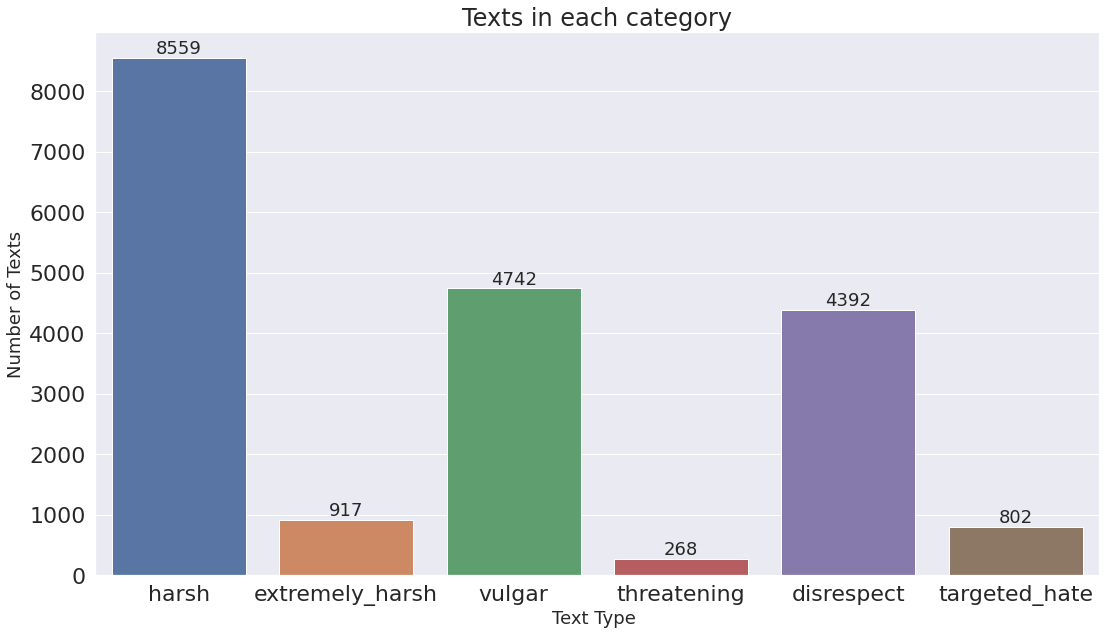

In [58]:
categories = list(df.columns.values)
categories.remove('id')
categories.remove('text')

sns.set(font_scale=2)
plt.figure(figsize=(18, 10))

ax = sns.barplot(categories, df.iloc[:, 2:].sum().values)

plt.title("Texts in each category", fontsize=24)
plt.ylabel('Number of Texts', fontsize=18)
plt.xlabel('Text Type ', fontsize=18)

rects = ax.patches
labels = df.iloc[:, 2:].sum().values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
            
plt.show()

**Observations**: Harsh is the most common type of text and is nearly equal to the sum of all other types of texts whereas threatening, extremely_harsh, targeted_hate are the rare ones among all of them. Some more interdependent labels will be discussed in later part of the module.

Now let us count the number of comments having multiple labels.

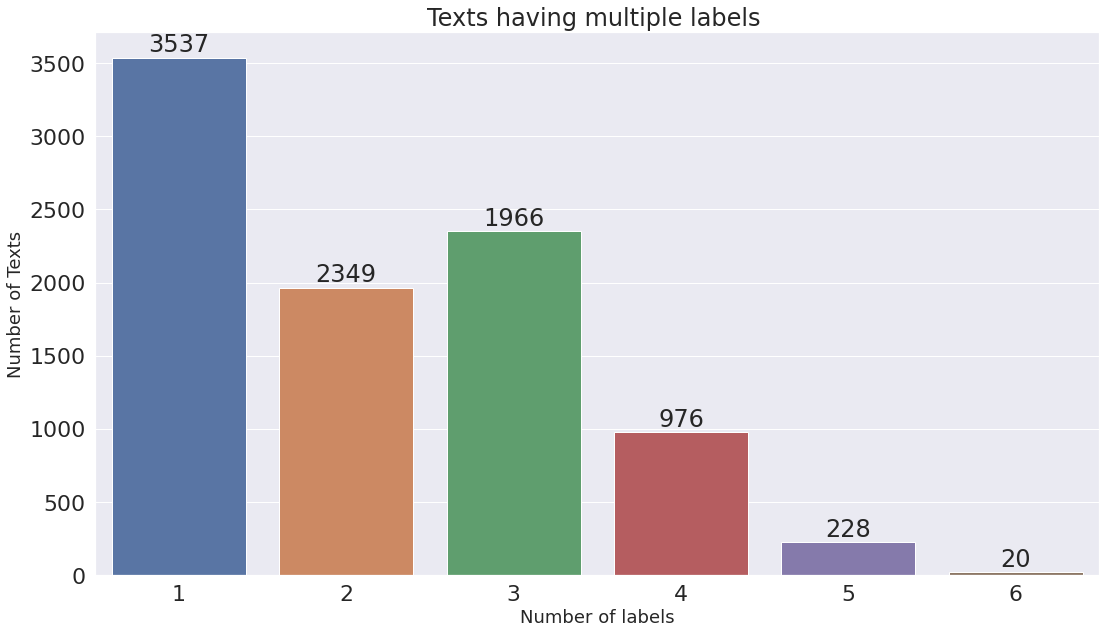

In [59]:
rowSums = df.iloc[:, 2:].sum(axis=1)

multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale=2)
plt.figure(figsize=(18, 10))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Texts having multiple labels ")
plt.ylabel('Number of Texts', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

# adding the text labels
rects = ax.patches
labels = multiLabel_counts.values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
            
plt.show()

**Observations**: All 6 labels at the same time is extremely rare and only one label takes up the majority.

Let us make a WordCloud to better understand the occurrences of the words which constitute in the majority.

In [60]:
# Since we need stopwords in this lets wait and implement this afterwards requires countvectorizer and tokenization so have to think where should we keep this


# Text -> Features

### BOW (Bag of Words)

Each text is represented as a vector consisting of the frequency / occurence(0,1) / weighted values of vocabulary (list of unique words).

![BOW](assets/BOW.png "Bag Of Words")

Disadvantages ->
1.	Vocabulary can become too large
2.	Each text vector will contain many 0's which will result in a sparse matrix (Why is that a problem?)
3.	Ordering of the words (grammar, meaning) is lost
4.	Words which occur frequently across all text vectors may introduce a bias.

### TF-IDF (Term Frequency and Inverse document Frequency)

TF-IDF kind of normalizes the text vectors. Frequent words in a text-vector are "rewarded", but they also get "punished" if they are frequent in other text-vectors too. Thus, higher weight is assigned to unique or rare terms considering all text-vectors.

TF(t,d) = (count of t in document d) / (Total words in document d)

IDF(t) = log(Total documents / Number of documents containing t)

![TF-IDF](assets/IDF.png "TF_IDF")

Disadvantages ->

1. TF-IDF is basically BOW with weights. It cannot capture the semantics / meaning of text.

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Explore other parameters of TfidVectorizer
vectorizer = TfidfVectorizer(binary=True, lowercase=True, stop_words={'english'})

X = vectorizer.fit_transform(df['text'])

In [62]:
vectorizer.get_feature_names()

# Spell Check necessary?

/home/mayank1609/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aaa',
 'aaaa',
 'aaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaany',
 'aaaaaaaaaah',
 'aaaaaaahhhhhhhhhhhhhhhhhhhhhhhh',
 'aaaah',
 'aaaannnnyyyywwwwhhhheeeerrrreeee',
 'aaaawwww',
 'aaaboyz',
 'aaages',
 'aaaghh',
 'aaah',
 'aaahhh',
 'aaai',
 'aaajade',
 'aaand',
 'aaaww',
 'aaba',
 'aaberg',
 'aabove',
 'aac',
 'aachen',
 'aachi',
 'aacs',
 'aad',
 'aademia',
 'aadmi',
 'aaffect',
 'aafia',
 'aaflight',
 'aage',
 'aagin',
 'aah',
 'aai',
 'aaiha',
 'aajonus',
 'aakash',
 'aake',
 'aalborg',
 'aalertbot',
 'aalexa',
 'aaliya',
 'aaliyah',
 'aalst',
 'aam',
 'aamir',
 'aamirjamil',
 'aamu',
 'aan',
 'aanas',
 'aand',
 'aang',
 'aao',
 'aaot',
 'aap',
 'aapl',
 'aapropriate',
 'aar',
 'aarabs',
 'aarau',
 'aardvark',
 'aare',
 'aarem',
 'aaroamal',
 'aarohi',
 'aaron',
 'aaroncrick',
 'aaronic',
 'aarons',
 'aaronshavit',
 'aaronsw',
 'aarp',
 'aarrow',
 'aarticles',
 'aaruveetil',
 'aas',
 'aat',
 'aatc',
 'aau',
 'aave',
 'aaviksoo',
 'aav

In [63]:
vectorizer.vocabulary_

{'december': 23464,
 'utc': 101338,
 'be': 9145,
 'interest': 47034,
 'not': 66289,
 'in': 45549,
 'argue': 5591,
 'but': 13837,
 'the': 95315,
 'policy': 73503,
 'which': 104839,
 'resolve': 80244,
 'our': 69082,
 'ongoing': 68078,
 'content': 20026,
 'dispute': 26344,
 'also': 3169,
 'see': 84919,
 'wikipedia': 105510,
 'wikiproject': 105590,
 'united': 100212,
 'states': 90535,
 'presidential': 74762,
 'election': 29306,
 'for': 35002,
 'what': 104734,
 'll': 55504,
 'work': 106484,
 'on': 68009,
 'moneybomb': 61907,
 'closer': 17955,
 'just': 50048,
 'self': 85085,
 'revert': 80644,
 'two': 98806,
 'different': 25481,
 'request': 80095,
 'echo': 28605,
 'would': 106610,
 'have': 41417,
 'will': 105794,
 'rephrase': 79897,
 'didn': 25400,
 'an': 3707,
 'answer': 4406,
 'to': 96680,
 'build': 13440,
 'agreement': 2011,
 'that': 95279,
 'should': 86659,
 'redlink': 78826,
 'given': 38114,
 'deletion': 23969,
 'reversion': 80641,
 'outline': 69162,
 'of': 67464,
 'article': 5974,
 'cal

# Model Selection and Training

This is a <b>multi-label classification</b> problem (Text can be classified into multiple labels or none)

NOTE - This is different from <b>multi-class classification</b> in which the sample is assigned to a single class from the pool of more than 2 classes.